In [1]:
# Recursive code for Matrix Multiplication
MAX = 300
i = 0
j = 0
k = 0


In [2]:
import numpy as np


class MatrixInverse():
    def __init__(self):
        self.float_point_operation = 0

                
    def multiply(self, A, B, C):
        n = C.shape[0]
        
        for i in range(n):
            for j in range(n):
                for k in range(n):
                    C[i][j] += A[i][k]*B[k][j]
                    self.float_point_operation += 1
        return C
        
        
    def split(self, matrix):
        """
        Splits a given matrix into quarters.
        Input: nxn matrix
        Output: tuple containing 4 n/2 x n/2 matrices corresponding to a, b, c, d
        """
        row, col = matrix.shape
        row2, col2 = row//2, col//2
        return matrix[:row2, :col2], matrix[:row2, col2:], matrix[row2:, :col2], matrix[row2:, col2:]

    
    def strassen(self, x, y, l=2):
        """
        Computes matrix product by divide and conquer approach, recursively.
        """

        # switch to multiplyMatrix
        if x.shape[0] <= 2**l:
            C = np.zeros((x.shape[0],x.shape[0]))
            return self.multiply(x, y, C)

        # Splitting the matrices into quadrants. This will be done recursively
        # until the base case is reached.
        a, b, c, d = self.split(x)
        e, f, g, h = self.split(y)

        # Computing the 7 products, recursively (p1, p2...p7)
        p1 = self.strassen(a, f - h, l) 
        p2 = self.strassen(a + b, h, l)       
        p3 = self.strassen(c + d, e, l)       
        p4 = self.strassen(d, g - e, l)       
        p5 = self.strassen(a + d, e + h, l)       
        p6 = self.strassen(b - d, g + h, l) 
        p7 = self.strassen(a - c, e + f, l) 

        # Computing the values of the 4 quadrants of the final matrix c
        c11 = p5 + p4 - p2 + p6 
        c12 = p1 + p2          
        c21 = p3 + p4           
        c22 = p1 + p5 - p3 - p7 
        self.float_point_operation += p1.shape[0]**2 * 8 #8 +/ - operations

        # Combining the 4 quadrants into a single matrix by stacking horizontally and vertically.
        c = np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))

        return c
    
    def inverse(self, a, l):
        if a.shape[0] == 1:
            return a
        
        a11, a12, a21, a22 = self.split(a)
        a11_inverse = self.inverse(a11, l)
        s22 = a22 - self.strassen(self.strassen(a21, a11_inverse, l), a12, l)
        s22_inverse = self.inverse(s22, l)
        new_a11 = a11_inverse + self.strassen(self.strassen(-a11_inverse, a12, l), s22_inverse, l)
        new_a12 = self.strassen(self.strassen(self.strassen(self.strassen(a11_inverse, a12, l), s22_inverse, l), a21, l), a11_inverse, l)
        new_a21 = self.strassen(self.strassen(-s22_inverse, a21, l), a11_inverse, l)
        new_a22 = s22_inverse
        self.float_point_operation += 2 * a11.shape[0]** 2 #to caluclate s22 and new_a11
        b = np.vstack((np.hstack((new_a11, new_a12)), np.hstack((new_a21, new_a22))))

        return b

In [3]:
import time
max_k = 8
l = 0 # < max_k

time_results = [] 
operation_results = [] 

for k in range(l, max_k):
    a = np.random.randint(1000, 2000, size=(2**k, 2**k))
    matrix_inverse = MatrixInverse()
    start_time = time.time()
    b = matrix_inverse.inverse(a, l)
    time_results.append(time.time() - start_time)
    operation_results.append(matrix_inverse.float_point_operation)

<ipython-input-2-33a95f8a0262>:15: RuntimeWarning: overflow encountered in double_scalars
  C[i][j] += A[i][k]*B[k][j]
<ipython-input-2-33a95f8a0262>:47: RuntimeWarning: invalid value encountered in subtract
  p1 = self.strassen(a, f - h, l)
<ipython-input-2-33a95f8a0262>:50: RuntimeWarning: invalid value encountered in subtract
  p4 = self.strassen(d, g - e, l)
<ipython-input-2-33a95f8a0262>:51: RuntimeWarning: invalid value encountered in add
  p5 = self.strassen(a + d, e + h, l)
<ipython-input-2-33a95f8a0262>:52: RuntimeWarning: invalid value encountered in add
  p6 = self.strassen(b - d, g + h, l)
<ipython-input-2-33a95f8a0262>:53: RuntimeWarning: invalid value encountered in add
  p7 = self.strassen(a - c, e + f, l)
<ipython-input-2-33a95f8a0262>:48: RuntimeWarning: invalid value encountered in add
  p2 = self.strassen(a + b, h, l)
<ipython-input-2-33a95f8a0262>:49: RuntimeWarning: invalid value encountered in add
  p3 = self.strassen(c + d, e, l)
<ipython-input-2-33a95f8a0262>:52

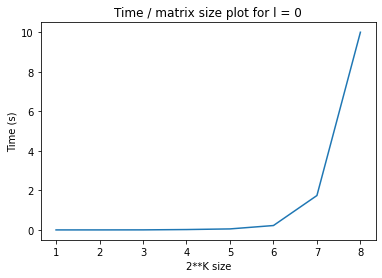

In [4]:
import matplotlib.pyplot as plt
    
plt.plot(list(range(1, max_k+1-l)), time_results)
plt.title(f"Time / matrix size plot for l = {l}")
plt.ylabel('Time (s)')
plt.xlabel('2**K size')
plt.show()

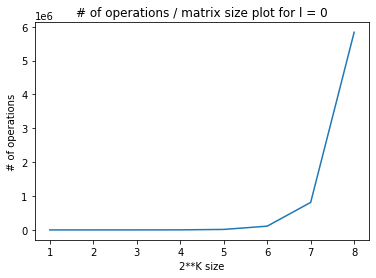

In [5]:
plt.plot(list(range(1, max_k+1-l)), operation_results)
plt.title(f"# of operations / matrix size plot for l = {l}")
plt.ylabel('# of operations')
plt.xlabel('2**K size')
plt.show()